# Tutorial: Use Pandas to convert wide to narrow data

This tutorial provides a quick walk-through on how to convert wide to narrow data using [pandas](https://pandas.pydata.org/docs/), a Python library used to analyze data. Datasets can be either [narrow ("long") or wide](https://en.wikipedia.org/wiki/Wide_and_narrow_data). Depending on your data processing needs, you may need to convert wide data to narrow data or vice versa. 

## Prerequisites
Please download this notebook as well as the `wide stats.csv` file and make sure they are in the same directory. This tutorial assumes you have a working knowledge of [cleaning datasets](https://towardsdatascience.com/simple-guide-to-data-cleaning-with-python-39203a14afeb), [python](https://docs.python.org/3/), and [Jupyter notebooks](https://jupyter.org/).

## Procedure
1. Start by importing the dataset.
2. Next, use the [`set_index()` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html) to specify one or more existing columns as the index.
* Then, use the [`stack()` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html) to create a series with a hierarchical index. This reshapes the data from a wide format to a narrow format.
* Use the [`reset_index()` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) to reset the index and convert the series back into a dataframe.
* Lastly, clean the newly created dataframe and export it as a spreadsheet.

## Import the data
Let's start by importing the libraries needed for this tutorial: `numpy` and `pandas`.

Then, let's import the sample dataset `wide stats.csv` and read it into a dataframe, `denmark_stats`. For this tutorial, you'll use a cleaned sample dataset based on Danish import/export to various trade partners between 2003 and 2018.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Read the downloaded content and turning it into a pandas dataframe
denmark_stats = pd.read_csv('wide stats.csv')

# Check the dataframe by printing a concise summary of the dataframe and showing the first few lines.
denmark_stats.info()
denmark_stats.head()

After checking that you've successfully read the dataset into a pandas dataframe, `denmark_stats`, you can start to prep the dataframe for reshaping.

## Set the index

Before you reshape the dataframe, it is important to set specific columns as the index. This prevents the specified columns from being reshaped as the data is transformed in the next step.

You can use the [`set_index()` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html) to set the index. This method can take one or more column keys. Let's set the index to the `Trade partner` and `Type` columns.

In [ ]:
# Select the columns you want to use as an index and store it as the variable "idx".
idx =['Trade partner','Type']

# Set the new index for the dataframe based on the variable above and save it to a new dataframe, "new_indexed_df".
new_indexed_df = denmark_stats.set_index(idx)

# Display the first few lines of the new dataframe to check the indexing.
new_indexed_df.head()

Now that you've set `Trade partner` and `Type` as indices, these two columns will not be affected as you reshape the dataset below.

## Reshape the dataset

Use the [`stack()` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html) to reshape the data from a wide to narrow format. This function takes all the columns which are not indexed and "stacks" them row-wise. In the lefthand image below, the "Name" column is indexed. Stacking this dataframe pivots the un-indexed columns converts them into one vertical column, as you can see on the right. Then, each row is repeated as a value.

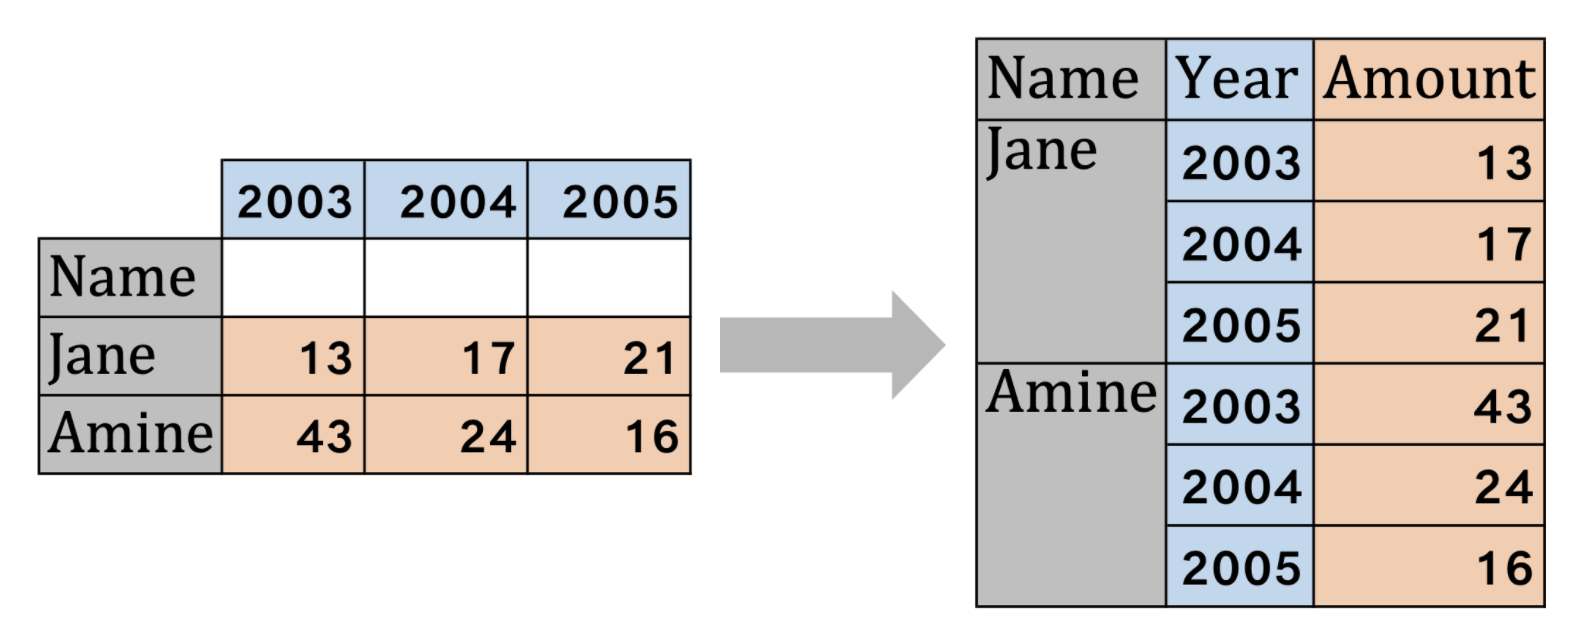

Let's use the `stack()` function to stack the `new_indexed_df` dataframe.

In [ ]:
# Use the stack() function to stack the dataframe. Save the result to the variable "stacked_df".
stacked_df = new_indexed_df.stack(dropna=False)

# Let's check out the results!
stacked_df.head()

As you can see, stacking the dataframe outputted a hierarchical indexed series which is narrow instead of wide.

## Reset the index

After you stacked the dataframe, it is now a series. You can use the [`reset_index()` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) to convert the series back into a dataframe.

In [ ]:
# Reset the index using the reset_index() method and save the resulting dataframe to the variable "stats".
stats = stacked_df.reset_index()

# Display the resulting dataframe.
stats.head()

## Clean your data

Almost done! Now that you've reshaped the dataframe from a wide to narrow format, it's time to clean the data again before you export your results.

In [ ]:
# Rename columns to represent their data.
stats = stats.rename(columns={'level_2':'Year',0:'Amount'})

# Make sure the data is set to the correct data type.
stats['Year'] = stats['Year'].astype(int)
stats['Amount'] = stats['Amount'].replace({'..':np.nan}).astype(float)

# Check your dataframe.
stats.info()

To export your dataframe as an Excel spreadsheet, use the `to_excel()` method.

In [ ]:
# Export your reshaped dataframe as a spreadsheet.
stats.to_excel("narrow stats.xlsx")

## What's next?

In this tutorial, you converted a dataframe from a wide format to a narrow format by setting the index, stacking the dataframe, and resetting the index. Now that you've learned the basics, you can explore other applications of [stacking, unstacking, and melting data](https://machinelearningknowledge.ai/pandas-tutorial-stack-unstack-and-melt/). Or, try your hand at your own data science project with [some sample datasets](https://www.kaggle.com/datasets).